In [2]:
import numpy as np
import empylib.miescattering as mie

# Testing Percus-Yevick model of hard spheres

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Validating-Monodispersed-case" data-toc-modified-id="Validating-Monodispersed-case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Validating Monodispersed case</a></span></li><li><span><a href="#Validating-polydispersed-case" data-toc-modified-id="Validating-polydispersed-case-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Validating polydispersed case</a></span></li><li><span><a href="#Testing-phase-function" data-toc-modified-id="Testing-phase-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Testing phase function</a></span><ul class="toc-item"><li><span><a href="#Input-parameters" data-toc-modified-id="Input-parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Input parameters</a></span></li><li><span><a href="#Comparing-phase-function-agains-single-sphere" data-toc-modified-id="Comparing-phase-function-agains-single-sphere-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing phase function agains single sphere</a></span></li><li><span><a href="#Comparing-scattering-parameters-obtained-from-phase-function" data-toc-modified-id="Comparing-scattering-parameters-obtained-from-phase-function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comparing scattering parameters obtained from phase function</a></span></li></ul></li><li><span><a href="#Testing-Heyeney-Greenstein" data-toc-modified-id="Testing-Heyeney-Greenstein-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing Heyeney-Greenstein</a></span><ul class="toc-item"><li><span><a href="#Comparing-phase-function-from-Mie-theory" data-toc-modified-id="Comparing-phase-function-from-Mie-theory-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparing phase function from Mie-theory</a></span></li></ul></li><li><span><a href="#Validating-Heyney-Greenstein-for-hard-spheres" data-toc-modified-id="Validating-Heyney-Greenstein-for-hard-spheres-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Validating Heyney-Greenstein for hard-spheres</a></span><ul class="toc-item"><li><span><a href="#Comparing-scattering-parameters-extracted-from-Heyney-Greenstein" data-toc-modified-id="Comparing-scattering-parameters-extracted-from-Heyney-Greenstein-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comparing scattering parameters extracted from Heyney-Greenstein</a></span></li><li><span><a href="#Comparing-phase-functions" data-toc-modified-id="Comparing-phase-functions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparing phase functions</a></span></li></ul></li></ul></div>

## Validating Monodispersed case

/tmp/ipykernel_250715/2031361750.py:12: RuntimeWarning: invalid value encountered in arcsin
  theta = 2*np.arcsin(q/(2*k0))


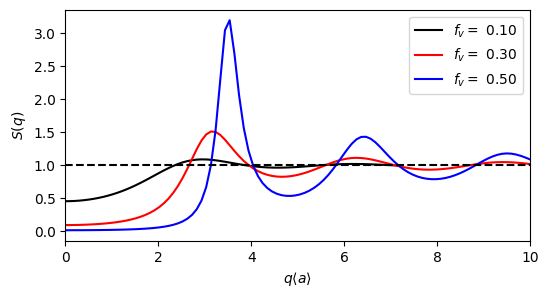

In [ ]:
import matplotlib.pyplot as plt
fv = np.array([0.10, 0.30, 0.50]) # volume fractions
lam = 0.5
Nh = 1.0
k0 = 2*np.pi/lam*Nh
R_mean = (3/(4*np.pi)*fv)**(1/3)
line_color = ['k', 'r', 'b']

fig, ax = plt.subplots(figsize = (6,3))
for i in range(len(fv)):
    q = np.linspace(0,10,100)/R_mean[i]
    theta = 2*np.arcsin(q/(2*k0))

    # Sq = structure_factor_PY(fv[i], lam, Nh, theta, 2*R, nD)
    Sq = mie.structure_factor_PY(lam, Nh, 2*R_mean[i], fv[i], theta = theta)
    ax.plot(q*R_mean[i], Sq[:,0], color = line_color[i], label = '$f_v =$ %.2f' % (fv[i]))

ax.plot(q*R_mean[i], np.ones_like(q), '--k')
ax.set_xlabel(r'$q\langle a \rangle$')
ax.set_ylabel(r'$S(q)$')
# ax.set_ylim(0.5, 1.2)
ax.set_xlim(0,10)
plt.legend()
plt.show()

## Validating polydispersed case

We want to validate the Percus-Yevick model for polydispersed hard spheres. The model is original from [Botet et al (2020), "Percus-Yevick structure factors made simple"](https://onlinelibrary-wiley-com.uai.idm.oclc.org/iucr/doi/10.1107/S1600576720014041) 

First, we import the data from Botet et al (2020), Fig. 2

In [4]:
import pandas as pd
df_black = pd.read_csv('Botet_validateFig2_black-line.csv', index_col = 0, header = None)
df_blue = pd.read_csv('Botet_validateFig2_blue-line.csv', index_col = 0)
df_red = pd.read_csv('Botet_validateFig2_red-line.csv', index_col = 0)

Now, we run `mie.struture_factor_PY` to validate the model

/tmp/ipykernel_250715/2692526252.py:16: RuntimeWarning: invalid value encountered in arcsin
  theta = 2*np.arcsin(q/(2*k0))


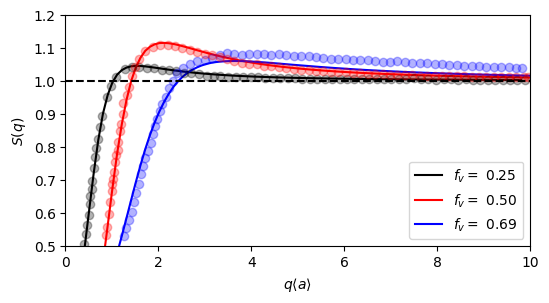

In [ ]:
import matplotlib.pyplot as plt
fv = np.array([0.25, 0.50, 0.69]) # volume fractions
lam = 0.5
Nh = 1.0
k0 = 2*np.pi/lam*Nh
R_mean = (3/(4*np.pi)*fv)**(1/3)
line_color = ['k', 'r', 'b']

fig, ax = plt.subplots(figsize = (6,3))
for i in range(len(fv)):
    # if i != 0: continue
    R = np.linspace(1E-5,10*R_mean[i],100)
    nD = np.exp(-R/R_mean[i])
    nD = nD/np.trapz(nD, R)
    q = np.linspace(0,10,100)/R_mean[i]
    theta = 2*np.arcsin(q/(2*k0))

    Sq = mie.structure_factor_PY(lam, Nh, 2*R, fv[i], nD, theta = theta)
    ax.plot(q*R_mean[i], Sq[:,0], color = line_color[i], label = '$f_v =$ %.2f' % (fv[i]))

plt.plot(df_black.index,df_black,'o k', alpha = 0.3, mfc = None)
plt.plot(df_blue.index,df_blue,'o b', alpha = 0.3, mfc = None)
plt.plot(df_red.index,df_red,'o r', alpha = 0.3, mfc = None)
ax.plot(q*R_mean[i], np.ones_like(q), '--k')
ax.set_xlabel(r'$q\langle a \rangle$')
ax.set_ylabel(r'$S(q)$')
ax.set_ylim(0.5, 1.2)
ax.set_xlim(0,10)
plt.legend()
plt.show()

## Testing phase function

### Input parameters

In [6]:
import empylib.nklib as nk
theta = np.radians(np.linspace(0,360,401))
lam = np.linspace(0.3,2.0,200)
Dp = 0.5
Np = nk.SiO2(lam)
Nh = 1.0
fv = 0.6
Nh = nk.emt_brugg(fv, Np, Nh)
phase_scat = mie.phase_scatt(theta, lam, Nh, Np, Dp)
phase_scat_dense = mie.phase_scatt_dense(theta, lam, Nh, Np, Dp, fv)

### Comparing phase function agains single sphere

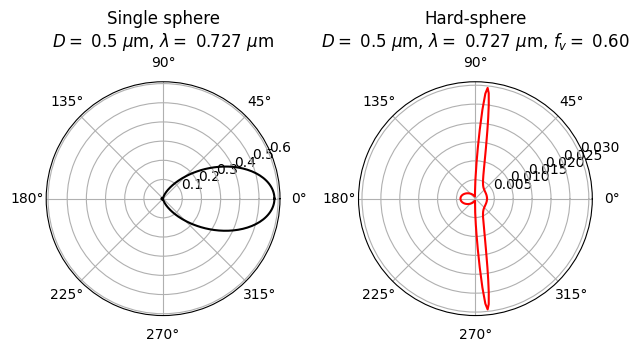

In [16]:
i_lam = 50
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})
ax[0].plot(theta, phase_scat[lam[i_lam]], '-k')
ax[0].set_title('Single sphere\n$D =$ %.1f $\mu$m, $\lambda =$ %.3f $\mu$m' % (Dp, lam[i_lam]))
ax[1].plot(theta, phase_scat_dense[lam[i_lam]], '-r')
ax[1].set_title('Hard-sphere\n$D =$ %.1f $\mu$m, $\lambda =$ %.3f $\mu$m, $f_v =$ %.2f' % (Dp, lam[i_lam], fv))
plt.tight_layout()
plt.show()

### Comparing scattering parameters obtained from phase function

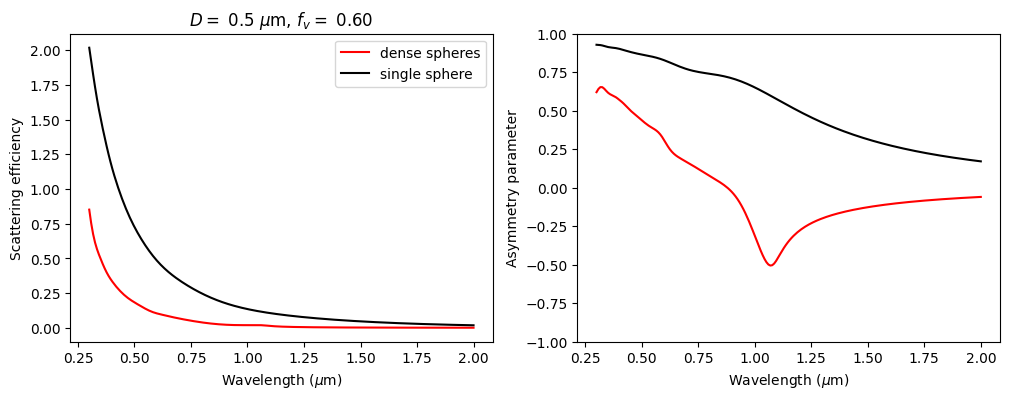

In [8]:
qsca_dense, gcos_dense = mie.scatter_from_phase_function(phase_scat_dense)
qext, qsca, gcos = mie.scatter_efficiency(lam, Nh, Np, Dp)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(lam, qsca_dense, '-r', label = 'dense spheres')
ax[0].plot(lam, qsca, '-k', label = 'single sphere')
ax[0].legend()
ax[0].set_xlabel(r'Wavelength ($\mu$m)')
ax[0].set_ylabel('Scattering efficiency')

ax[1].plot(lam, gcos_dense, '-r', label = 'dense spheres')
ax[1].plot(lam, gcos, '-k', label = 'single sphere')
ax[1].set_xlabel(r'Wavelength ($\mu$m)')
ax[1].set_ylabel('Asymmetry parameter')
ax[1].set_ylim(-1,1)
ax[0].set_title('$D =$ %.1f $\mu$m, $f_v =$ %.2f' % (Dp, fv))
plt.show()

## Testing Heyeney-Greenstein

We want to validate the Heyney-Greenstein model. If correct the extracted scattering parameters, $Q_\mathrm{sca}$ and $\mu_\mathrm{sca}$, should match exactly those from Mie theory

In [9]:
qext, qsca, gcos = mie.scatter_efficiency(lam, Nh, Np, Dp)
p_theta_HG = mie.phase_scatt_HG(theta, lam, gcos, qsca)

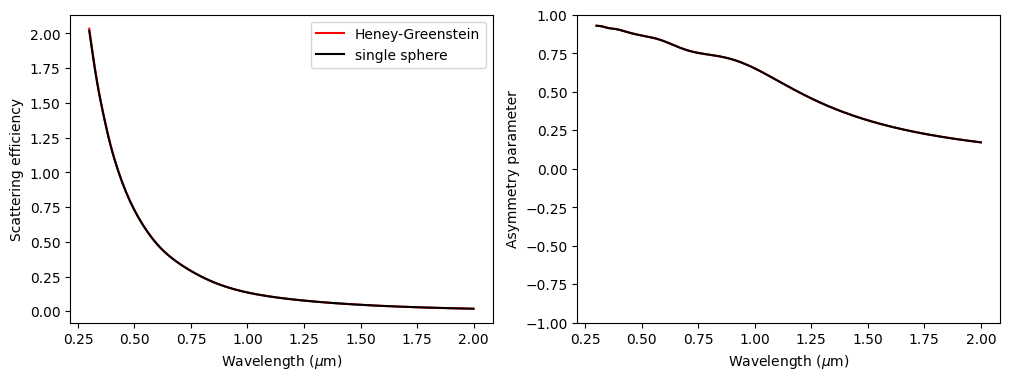

In [10]:
qsca_HG, gcos_HG = mie.scatter_from_phase_function(p_theta_HG)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(lam, qsca_HG, '-r', label = 'Heney-Greenstein')
ax[0].plot(lam, qsca, '-k', label = 'single sphere')
ax[0].legend()
ax[0].set_xlabel(r'Wavelength ($\mu$m)')
ax[0].set_ylabel('Scattering efficiency')

ax[1].plot(lam, gcos_HG, '-r', label = 'Heney-Greenstein')
ax[1].plot(lam, gcos, '-k', label = 'single sphere')
ax[1].set_xlabel(r'Wavelength ($\mu$m)')
ax[1].set_ylabel('Asymmetry parameter')
ax[1].set_ylim(-1,1)
plt.show()

### Comparing phase function from Mie-theory

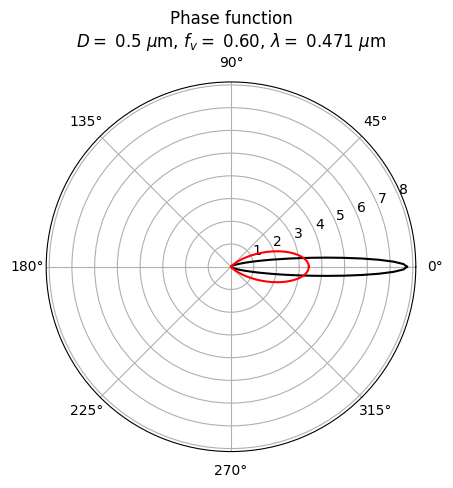

In [11]:
i_lam = 20
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, p_theta_HG[lam[i_lam]], '-k')
ax.plot(theta, phase_scat[lam[i_lam]], '-r')
ax.set_title('Phase function\n$D =$ %.1f $\mu$m, $f_v =$ %.2f, $\lambda =$ %.3f $\mu$m' % (Dp, fv, lam[i_lam]))
plt.show()

## Validating Heyney-Greenstein for hard-spheres

### Comparing scattering parameters extracted from Heyney-Greenstein

In [12]:
p_theta_HG = mie.phase_scatt_HG(theta, lam, gcos_dense, qsca_dense)

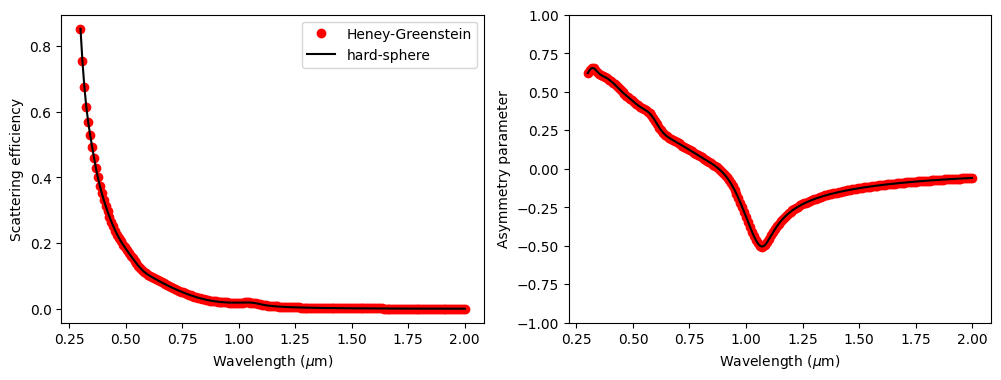

In [13]:
qsca_HG, gcos_HG = mie.scatter_from_phase_function(p_theta_HG)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(lam, qsca_HG, 'o r', label = 'Heney-Greenstein')
ax[0].plot(lam, qsca_dense, '-k', label = 'hard-sphere')
ax[0].legend()
ax[0].set_xlabel(r'Wavelength ($\mu$m)')
ax[0].set_ylabel('Scattering efficiency')

ax[1].plot(lam, gcos_HG, 'o r', label = 'Heney-Greenstein')
ax[1].plot(lam, gcos_dense, '-k', label = 'hard-sphere')
ax[1].set_xlabel(r'Wavelength ($\mu$m)')
ax[1].set_ylabel('Asymmetry parameter')
ax[1].set_ylim(-1,1)
plt.show()

### Comparing phase functions

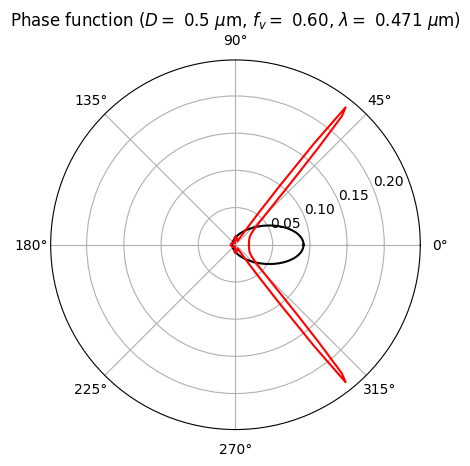

In [14]:
i_lam = 20
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, p_theta_HG[lam[i_lam]], '-k')
ax.plot(theta, phase_scat_dense[lam[i_lam]], '-r')
ax.set_title(r'Phase function ($D =$ %.1f $\mu$m, $f_v =$ %.2f, $\lambda =$ %.3f $\mu$m)' % (Dp, fv, lam[i_lam]))
plt.show()